<a href="https://colab.research.google.com/github/JoungMinJu/machine_learning/blob/main/5%EC%9E%A5/%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

캔에 인쇄된 알코올 도수, 당도, pH 값으로 와인 종류를 구분하는 법.

In [1]:
import pandas as pd
wine=pd.read_csv('https://bit.ly/wine-datem')

In [2]:
wine. head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [3]:
#0이면 레드와인 1이면 화이트 와인인 이진분류 문제

wine.info()

#데이터프렝미 각 열의 데이터 타입과 누락된 데이터가 있는지 확인하는데 유용

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [6]:
wine.describe()
#열에 대한 간략한 통계를 출력

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [7]:
data=wine[['alcohol','sugar','pH']].to_numpy()
target=wine['class'].to_numpy()

In [9]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target=train_test_split(data, target, test_size=0.2, random_state=42)

#기본값은 25%를 테스트 세트로 지정. 근데 여기서는 샘플 개수가 충분히 많으므로 20% 정도만 테스트 세트로 남긴다.

In [10]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

In [12]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_input, test_target))

#로지스틱회귀로는 좋은 성능을 내지 못하고 있음
# 이 문제를 해결하기 위해 규제 매개변수 C의 값을 바꿔보기, 아니면 solver 매개변수에서 다른 알고리즘을 선택할 수도 있음. 다항 특성을 만들어서 추가할 수도 있음

0.7808350971714451
0.7376923076923076


In [13]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


결정트리 모델은 스무고개와 같다. 

사이킷런의 DecisionTreeClassifier 클래스를사용한다. 

In [14]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

#과대적합 된 모델임을 확인할 수 있다.

0.996921300750433
0.8592307692307692


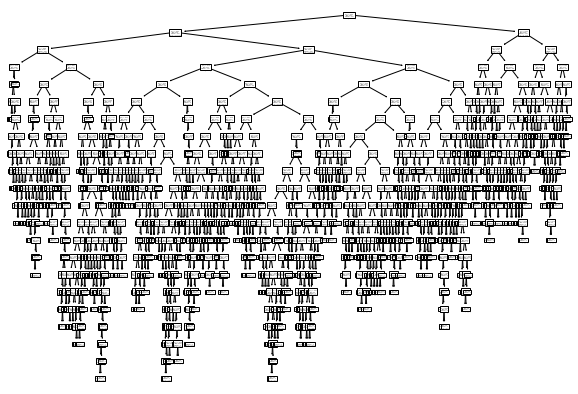

In [15]:
#모델을 그림으로도 표현해보기

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

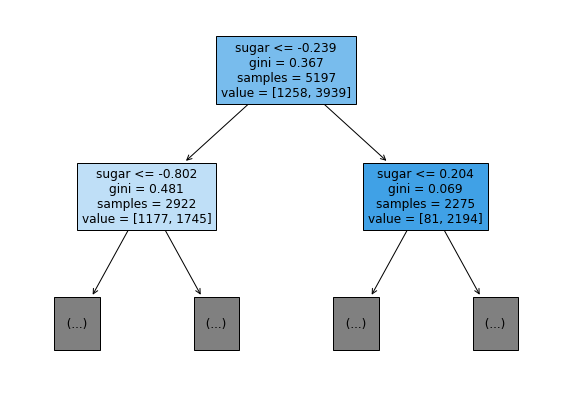

In [16]:
#plot_tree() 함수에서 트리의 깊이를 제한해서 출력해보기
#filled 매개변수에서 클래스에 맞게 노드의 색을 칠할 수 있음.

plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()


#첫행은 테스트 조건, 
#두번째는 불순도
#세번쨰는 총 샘플 수
#네번째는 클래스별 샘플 수


#filled는 어떤 클래스의 비율이 높아지면 더 진한색으로 표시된다.
#학습을 멈추는 시점에는 해당 노드에서 더 많은 비율을 차지하는 클래스로 분류된다.


불순도 

DecisionTreeClassifier의 기본 criterion은 gini

매개변수의 용도는 노드에서 데이터를 분할할 기준을 정하는 것이다.


지니불순도는 클래스의 비율을 제곱해서 더한 다음 1ㅣ에서 빼면된다. 

노드에 하나의 클래스만 있따면 지니불순도는 0이 된다.

부모노드와 자식노드 사이의 불순도 차이를 정보 이득이라 부른다. 
알고리즘은 정보이득이 최대가 되도록 데이터를 나눈다. 

엔트포리 불순도를 사용할수도 있다. 얘는 노드의 클래스의 비율을 사용하는 것은 동일하지만 밑이 2인 로그를 사용하여 곱한다. 보통 지니 불순도와 엔트로피 불순도가 만든 결과의 차이는 크지 않다. 

즉

불순도 기준을 사용해 정보이득이 최대가 되도록 노드를 분할하는 것이 결정트리 알고리즘. 

근데 앞의 트리는 제한 없이 자라났기 때문에 과대적합되었다.

In [17]:
dt=DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


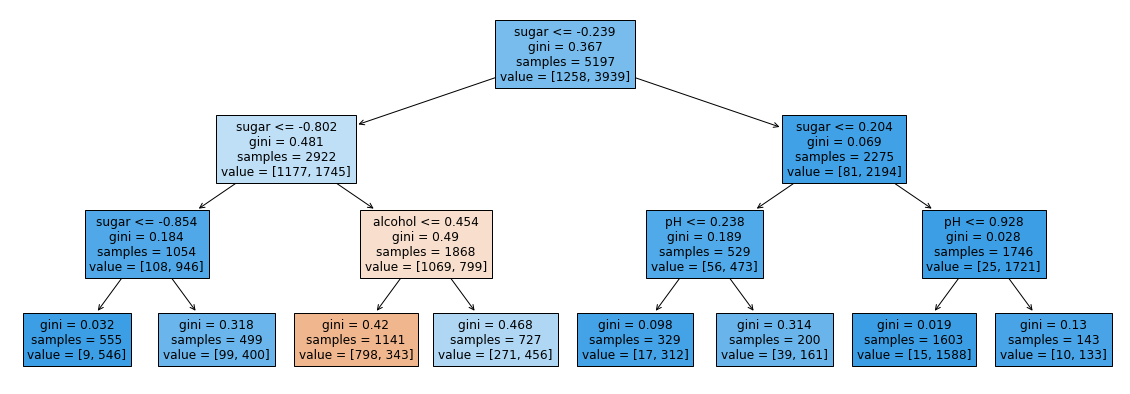

In [19]:
plt.figure(figsize=(20,7))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

In [ ]:
#불순도를 기준으로 샘플을 나눈다. 불순도는 클래스별 비율을 가지고!!!계산한다.
#샘플을 어떤 클래스 비율로 나누는 지 계산할 때 특성값의 스케일이 계산에 영향을 미칠까?ㄴㄴㄴㄴ아님
#따라서 표준화 전처리를 할 필요가 없음. 이것이 장점

In [20]:
dt=DecisionTreeClassifier(max_depth=3, random_state=42)

#전처리하기 전으로 학습해봐도 결과는 동일
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


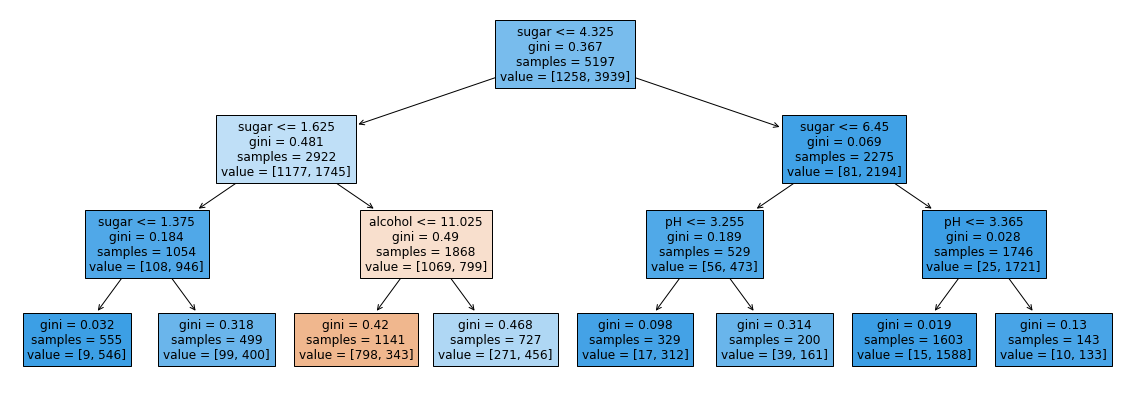

In [21]:
plt.figure(figsize=(20,7))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

#특성값 전처리 안해서 훨씬 이해하기 쉬움


In [22]:
#결정트리는 어떤 특성이 가장 유용한지 나타내는 특성 중요도를 계산해준다.
#루트 노드와 깊이 1에서 당도를 사용했으니까 아마 당도가 가장 유용한 특성이겠지


print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]
